Navneet Shankar 171EC129
Abhishek Ghadge 171EC103
Kalva Sai Sharmila 181EC119
Uday Mohan Lal 181EC250

In [ ]:
import urllib
import urllib.request
import tarfile
 
def download_and_extract_tar(url):
    print("Downloading and extracting %s " % (url))
    tar_stream = urllib.request.urlopen(url)
    tar_file = tarfile.open(fileobj=tar_stream, mode="r|gz")
    tar_file.extractall()
 
train_url = "http://www.openslr.org/resources/12/train-clean-100.tar.gz"
dev_url = "http://www.openslr.org/resources/12/dev-clean.tar.gz"
test_url = "http://www.openslr.org/resources/12/test-clean.tar.gz"
 
download_and_extract_tar(train_url)
download_and_extract_tar(dev_url)
download_and_extract_tar(test_url)

KeyboardInterrupt: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pydub

In [ ]:
import pydub
import os
from tqdm import tqdm
import glob
 
def flac2wav(filepath): 
    base_file_path = os.path.dirname(filepath)
    filename = os.path.basename(filepath)
    filename_no_ext = os.path.splitext(filename)[0]
    audio = AudioSegment.from_file(filepath, "flac")
    wav_file_path = base_file_path + '/' + filename_no_ext +'.wav'
    audio.export(wav_file_path, format="wav")
 
def convert_flac_to_wav(train_path, dev_path, test_path):
    train_flac = [file for file in glob.glob(train_path + "/*/*/*.flac")]
    dev_flac = [file for file in glob.glob(dev_path + "/*/*/*.flac")]
    test_flac = [file for file in glob.glob(test_path + "/*/*/*.flac")]
    
    print("Converting %d train %d dev and %d test flac files into wav files" 
          % (len(train_flac), len(dev_flac), len(test_flac)))    
    
    print("Processing train")
    for f in tqdm(train_flac):
        flac2wav(f)
    
    print("Processing dev")
    for f in tqdm(dev_flac):
        flac2wav(f)
        
    print("Processing test")
    for f in tqdm(test_flac):
        flac2wav(f)

In [ ]:
def create_per_file_transcripts(file):
    file_toks = file.split('.')
    base_file_path = os.path.dirname(file)
 
 
    with open(file, 'r') as fd:
        lines = fd.readlines()
        for line in lines:
            toks = line.split(' ')
            wav_file_name = base_file_path + '/' + toks[0] + '.txt'
 
            with open(wav_file_name, 'w') as of:
                trans = " ".join([t.lower() for t in toks[1:]])
                of.write(trans)
                of.write('\n')
 
def gen_transcripts(train_path, dev_path, test_path):
    train_transcripts = [file for file in glob.glob(train_path +"/*/*/*.txt")]
    dev_transcripts = [file for file in glob.glob(dev_path + "/*/*/*.txt")]
    test_transcripts = [file for file in glob.glob(test_path + "/*/*/*.txt")]
    
    print("Converting %d train %d dev and %d test aggregate transcripts into individual transcripts" 
          % (len(train_transcripts), len(dev_transcripts),len(test_transcripts)))
    
    print("Processing train")
    for f in tqdm.tqdm(train_transcripts):
        create_per_file_transcripts(f)
    
    print("Processing dev")
    for f in tqdm.tqdm(dev_transcripts):
        create_per_file_transcripts(f)
        
    print("Processing test")
    for f in tqdm.tqdm(test_transcripts):
        create_per_file_transcripts(f)

In [ ]:
speech_data_path = "LibriSpeech"
train_path = speech_data_path + "/train-clean-100"
dev_path = speech_data_path + "/dev-clean"
test_path = speech_data_path + "/test-clean"

all_train_path = train_path + "-all"
all_dev_path = dev_path + "-all"
all_test_path = test_path + "-all"

In [ ]:
import shutil ,sys

In [ ]:
convert_flac_to_wav('/content/LibriSpeech/train-clean-100','/content/LibriSpeech/dev-clean','/content/LibriSpeech/test-clean')

  0%|          | 0/28539 [00:00<?, ?it/s]

Converting 28539 train 2703 dev and 2620 test flac files into wav files
Processing train


  0%|          | 1/2703 [00:00<06:39,  6.77it/s]

Processing dev


  0%|          | 1/2620 [00:00<05:33,  7.86it/s]

Processing test


100%|██████████| 2620/2620 [05:39<00:00,  7.71it/s]


In [ ]:
def remove_files_with_ext(directory, ext):
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(ext):
                path_to_file = os.path.join(root, file)
                print("Removing file %s " % (path_to_file))
                os.remove(path_to_file)
 
remove_files_with_ext(train_path, "flac")
remove_files_with_ext(dev_path, "flac")
remove_files_with_ext(test_path, "flac")

Streaming output truncated to the last 5000 lines.
Removing file LibriSpeech/dev-clean/6319/64726/6319-64726-0008.flac 
Removing file LibriSpeech/dev-clean/6319/64726/6319-64726-0005.flac 
Removing file LibriSpeech/dev-clean/6319/64726/6319-64726-0013.flac 
Removing file LibriSpeech/dev-clean/6319/64726/6319-64726-0017.flac 
Removing file LibriSpeech/dev-clean/6319/64726/6319-64726-0007.flac 
Removing file LibriSpeech/dev-clean/6319/64726/6319-64726-0010.flac 
Removing file LibriSpeech/dev-clean/6319/64726/6319-64726-0001.flac 
Removing file LibriSpeech/dev-clean/6319/64726/6319-64726-0016.flac 
Removing file LibriSpeech/dev-clean/6319/64726/6319-64726-0011.flac 
Removing file LibriSpeech/dev-clean/6319/64726/6319-64726-0009.flac 
Removing file LibriSpeech/dev-clean/6319/64726/6319-64726-0003.flac 
Removing file LibriSpeech/dev-clean/6319/64726/6319-64726-0002.flac 
Removing file LibriSpeech/dev-clean/6319/64726/6319-64726-0020.flac 
Removing file LibriSpeech/dev-clean/6319/64726/6319-

In [ ]:
def move_files(from_path, to_path):
    if not os.path.exists(to_path):
        print("Creating dir %s" % (to_path))
        os.makedirs(to_path)
    for root, _, files in os.walk(from_path):
        for file in files:
            path_to_file = os.path.join(root, file)
            base_file_path = os.path.dirname(file)
            to_path_file = to_path + '/' + file
            print("Moving file from %s to %s " % (path_to_file, to_path_file))
            shutil.move(path_to_file, to_path_file)
move_files(train_path, all_train_path)
move_files(dev_path, all_dev_path)
move_files(test_path, all_test_path)

Streaming output truncated to the last 5000 lines.
Moving file from LibriSpeech/dev-clean/1919/142785/1919-142785-0012.wav to LibriSpeech/dev-clean-all/1919-142785-0012.wav 
Moving file from LibriSpeech/dev-clean/1919/142785/1919-142785-0049.wav to LibriSpeech/dev-clean-all/1919-142785-0049.wav 
Moving file from LibriSpeech/dev-clean/1919/142785/1919-142785-0008.wav to LibriSpeech/dev-clean-all/1919-142785-0008.wav 
Moving file from LibriSpeech/dev-clean/1919/142785/1919-142785-0020.wav to LibriSpeech/dev-clean-all/1919-142785-0020.wav 
Moving file from LibriSpeech/dev-clean/1919/142785/1919-142785-0023.wav to LibriSpeech/dev-clean-all/1919-142785-0023.wav 
Moving file from LibriSpeech/dev-clean/1919/142785/1919-142785-0051.wav to LibriSpeech/dev-clean-all/1919-142785-0051.wav 
Moving file from LibriSpeech/dev-clean/1919/142785/1919-142785-0042.wav to LibriSpeech/dev-clean-all/1919-142785-0042.wav 
Moving file from LibriSpeech/dev-clean/1919/142785/1919-142785-0058.wav to LibriSpeech/d

In [ ]:
remove_files_with_ext(all_train_path, "trans.txt")
remove_files_with_ext(all_dev_path, "trans.txt")
remove_files_with_ext(all_test_path, "trans.txt")

Removing file LibriSpeech/train-clean-100-all/2910-131096.trans.txt 
Removing file LibriSpeech/train-clean-100-all/2092-145706.trans.txt 
Removing file LibriSpeech/train-clean-100-all/8770-295465.trans.txt 
Removing file LibriSpeech/train-clean-100-all/27-124992.trans.txt 
Removing file LibriSpeech/train-clean-100-all/669-129074.trans.txt 
Removing file LibriSpeech/train-clean-100-all/3857-182317.trans.txt 
Removing file LibriSpeech/train-clean-100-all/8098-278278.trans.txt 
Removing file LibriSpeech/train-clean-100-all/5703-47212.trans.txt 
Removing file LibriSpeech/train-clean-100-all/7517-100437.trans.txt 
Removing file LibriSpeech/train-clean-100-all/5322-7680.trans.txt 
Removing file LibriSpeech/train-clean-100-all/3982-182255.trans.txt 
Removing file LibriSpeech/train-clean-100-all/481-123720.trans.txt 
Removing file LibriSpeech/train-clean-100-all/89-219.trans.txt 
Removing file LibriSpeech/train-clean-100-all/83-9960.trans.txt 
Removing file LibriSpeech/train-clean-100-all/7511

In [ ]:
!rm -r LibriSpeech/dev-clean

In [ ]:
!rm -r LibriSpeech/test-clean

In [ ]:
!rm -r LibriSpeech/train-clean-100

In [ ]:
import os
import sys
import random
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from PIL import ImageFile
import cv2
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout, Lambda
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, UpSampling2D
from tensorflow.keras.layers import concatenate , Flatten , Dense
from tensorflow.keras.layers import Activation ,add ,multiply
from tensorflow.keras.layers import LeakyReLU , PReLU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [ ]:
def attention_block_2d(x, g, inter_channel, data_format='channels_last'):
    theta_x = Conv2D(inter_channel, [1, 1], strides=[1, 1], data_format=data_format)(x)
    phi_g = Conv2D(inter_channel, [1, 1], strides=[1, 1], data_format=data_format)(g)
    f = Activation('relu')(add([theta_x, phi_g]))
    psi_f = Conv2D(1, [1, 1], strides=[1, 1], data_format=data_format)(f)
    rate = Activation('sigmoid')(psi_f)
    att_x = multiply([x, rate])

    return att_x

In [ ]:
def unet_model(input_size = (128,128,1)):
  size_filter_in = 16
  #kernel_init = 'glorot_uniform'
  kernel_init = 'he_normal'
  activation_layer = None 
  inputs = Input(input_size)
  conv1 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(inputs)
  conv1 = LeakyReLU()(conv1)
  conv1 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv1)
  conv1 = LeakyReLU()(conv1)
  pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
  conv2 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool1)
  conv2 = LeakyReLU()(conv2)
  conv2 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv2)
  conv2 = LeakyReLU()(conv2)
  pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
  conv3 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool2)
  conv3 = LeakyReLU()(conv3)
  conv3 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv3)
  conv3 = LeakyReLU()(conv3)
  pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
  conv4 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool3)
  conv4 = LeakyReLU()(conv4)
  conv4 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv4)
  conv4 = LeakyReLU()(conv4)
  drop4 = Dropout(0.5)(conv4)
  pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

  conv5 = Conv2D(size_filter_in*16, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool4)
  conv5 = LeakyReLU()(conv5)
  conv5 = Conv2D(size_filter_in*16, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv5)
  conv5 = LeakyReLU()(conv5)
  drop5 = Dropout(0.5)(conv5)
  
  up6 = Conv2D(size_filter_in*8, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(drop5))
  up6 = LeakyReLU()(up6)
  in_channel = drop5.get_shape().as_list()[3]
  drop4 = attention_block_2d(x=drop4, g=up6 ,inter_channel=in_channel // 4, data_format='channels_last')
  merge6 = concatenate([drop4,up6], axis = 3)
  conv6 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge6)
  conv6 = LeakyReLU()(conv6)
  conv6 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv6)
  conv6 = LeakyReLU()(conv6)
  up7 = Conv2D(size_filter_in*4, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(conv6))
  up7 = LeakyReLU()(up7)
  in_channel = drop5.get_shape().as_list()[3]
  conv3 = attention_block_2d(x=conv3, g=up7 ,inter_channel=in_channel // 4, data_format='channels_last')
  merge7 = concatenate([conv3,up7], axis = 3)
  conv7 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge7)
  conv7 = LeakyReLU()(conv7)
  conv7 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv7)
  conv7 = LeakyReLU()(conv7)
  up8 = Conv2D(size_filter_in*2, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(conv7))
  up8 = LeakyReLU()(up8)
  in_channel = drop5.get_shape().as_list()[3]
  conv2 = attention_block_2d(x=conv2, g=up8 ,inter_channel=in_channel // 4, data_format='channels_last')
  merge8 = concatenate([conv2,up8], axis = 3)
  conv8 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge8)
  conv8 = LeakyReLU()(conv8)
  conv8 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv8)
  conv8 = LeakyReLU()(conv8)
  
  up9 = Conv2D(size_filter_in, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(conv8))
  up9 = LeakyReLU()(up9)
  in_channel = drop5.get_shape().as_list()[3]
  conv1 = attention_block_2d(x=conv1, g=up9 ,inter_channel=in_channel // 4, data_format='channels_last')
  merge9 = concatenate([conv1,up9], axis = 3)
  conv9 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge9)
  conv9 = LeakyReLU()(conv9)
  conv9 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv9)
  conv9 = LeakyReLU()(conv9)
  conv9 = Conv2D(2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv9)
  conv9 = LeakyReLU()(conv9)
  conv10 = Conv2D(1, 1, activation = 'tanh')(conv9)

  model = Model(inputs,conv10)
  model.compile(optimizer = 'adam', loss = tf.keras.losses.Huber(), metrics = ['mae'])
  
  model.summary()
  return model


In [ ]:
model=unet_model((128,128,1))

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d_36 (Conv2D)              (None, 128, 128, 16) 160         input_2[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_23 (LeakyReLU)      (None, 128, 128, 16) 0           conv2d_36[0][0]                  
__________________________________________________________________________________________________
conv2d_37 (Conv2D)              (None, 128, 128, 16) 2320        leaky_re_lu_23[0][0]             
____________________________________________________________________________________________

In [ ]:
!wget "https://github.com/karoldvl/ESC-50/archive/master.zip"

--2021-04-30 19:11:25--  https://github.com/karoldvl/ESC-50/archive/master.zip
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/karolpiczak/ESC-50/archive/master.zip [following]
--2021-04-30 19:11:26--  https://github.com/karolpiczak/ESC-50/archive/master.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/karolpiczak/ESC-50/zip/master [following]
--2021-04-30 19:11:26--  https://codeload.github.com/karolpiczak/ESC-50/zip/master
Resolving codeload.github.com (codeload.github.com)... 52.68.31.213
Connecting to codeload.github.com (codeload.github.com)|52.68.31.213|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [    <=>             ] 615.7

In [ ]:
!unzip master.zip

Archive:  master.zip
5ade7ae821cd420f0df92fe61409fc1fce50a3bf
   creating: ESC-50-master/
   creating: ESC-50-master/.circleci/
  inflating: ESC-50-master/.circleci/config.yml  
   creating: ESC-50-master/.github/
  inflating: ESC-50-master/.github/stale.yml  
 extracting: ESC-50-master/.gitignore  
  inflating: ESC-50-master/LICENSE   
  inflating: ESC-50-master/README.md  
   creating: ESC-50-master/audio/
  inflating: ESC-50-master/audio/1-100032-A-0.wav  
  inflating: ESC-50-master/audio/1-100038-A-14.wav  
  inflating: ESC-50-master/audio/1-100210-A-36.wav  
  inflating: ESC-50-master/audio/1-100210-B-36.wav  
  inflating: ESC-50-master/audio/1-101296-A-19.wav  
  inflating: ESC-50-master/audio/1-101296-B-19.wav  
  inflating: ESC-50-master/audio/1-101336-A-30.wav  
  inflating: ESC-50-master/audio/1-101404-A-34.wav  
  inflating: ESC-50-master/audio/1-103298-A-9.wav  
  inflating: ESC-50-master/audio/1-103995-A-30.wav  
  inflating: ESC-50-master/audio/1-103999-A-30.wav  
  infla

In [ ]:
!rm -r sample_data

In [ ]:
!pip install librosa-0.6.0

ERROR: Could not find a version that satisfies the requirement librosa-0.6.0 (from versions: none)
ERROR: No matching distribution found for librosa-0.6.0


In [ ]:
import librosa
import matplotlib
import numpy
import pandas
import seaborn
import tqdm

In [ ]:
from scipy.io import wavfile
import soundfile as sf

In [ ]:
def create_data(noise_dir, voice_dir, path_save_time_serie, path_save_sound, path_save_spectrogram, sample_rate,
min_duration, frame_length, hop_length_frame, hop_length_frame_noise, nb_samples, n_fft, hop_length_fft):

    list_noise_files = os.listdir(noise_dir)
    list_voice_files = os.listdir(voice_dir)

    def remove_ds_store(lst):
        if '.DS_Store' in lst:
            lst.remove('.DS_Store')

        return lst

    list_noise_files = remove_ds_store(list_noise_files)
    list_voice_files = remove_ds_store(list_voice_files)

    nb_voice_files = len(list_voice_files)
    nb_noise_files = len(list_noise_files)


    # Extracting noise and voice from folder and convert to numpy
    noise = audio_files_to_numpy(noise_dir, list_noise_files, sample_rate,
                                     frame_length, hop_length_frame_noise, min_duration)

    voice = audio_files_to_numpy(voice_dir, list_voice_files,
                                     sample_rate, frame_length, hop_length_frame, min_duration)

    # Blend some clean voices with random selected noises (and a random level of noise)
    prod_voice, prod_noise, prod_noisy_voice = blend_noise_randomly(
            voice, noise, nb_samples, frame_length)

    # To save the long audio generated to disk to QC:
    noisy_voice_long = prod_noisy_voice.reshape(1, nb_samples * frame_length)
    #librosa.output.write_wav(path_save_sound + 'noisy_voice_long.wav', noisy_voice_long[0, :], sample_rate)
    sf.write(path_save_sound + 'noisy_voice_long.wav', noisy_voice_long[0, :], sample_rate)
    voice_long = prod_voice.reshape(1, nb_samples * frame_length)
    sf.write(path_save_sound + 'voice_long.wav', voice_long[0, :], sample_rate)
    noise_long = prod_noise.reshape(1, nb_samples * frame_length)
    sf.write(path_save_sound + 'noise_long.wav', noise_long[0, :], sample_rate)

    # Squared spectrogram dimensions
    dim_square_spec = int(n_fft / 2) + 1

    # Create Amplitude and phase of the sounds
    m_amp_db_voice,  m_pha_voice = numpy_audio_to_matrix_spectrogram(
            prod_voice, dim_square_spec, n_fft, hop_length_fft)
    m_amp_db_noise,  m_pha_noise = numpy_audio_to_matrix_spectrogram(
            prod_noise, dim_square_spec, n_fft, hop_length_fft)
    m_amp_db_noisy_voice,  m_pha_noisy_voice = numpy_audio_to_matrix_spectrogram(
            prod_noisy_voice, dim_square_spec, n_fft, hop_length_fft)

    # Save to disk for Training / QC
    np.save(path_save_time_serie + 'voice_timeserie', prod_voice)
    np.save(path_save_time_serie + 'noise_timeserie', prod_noise)
    np.save(path_save_time_serie + 'noisy_voice_timeserie', prod_noisy_voice)


    np.save(path_save_spectrogram + 'voice_amp_db', m_amp_db_voice)
    np.save(path_save_spectrogram + 'noise_amp_db', m_amp_db_noise)
    np.save(path_save_spectrogram + 'noisy_voice_amp_db', m_amp_db_noisy_voice)

    np.save(path_save_spectrogram + 'voice_pha_db', m_pha_voice)
    np.save(path_save_spectrogram + 'noise_pha_db', m_pha_noise)
    np.save(path_save_spectrogram + 'noisy_voice_pha_db', m_pha_noisy_voice)

In [ ]:
def audio_to_audio_frame_stack(sound_data, frame_length, hop_length_frame):

    sequence_sample_length = sound_data.shape[0]

    sound_data_list = [sound_data[start:start + frame_length] for start in range(
    0, sequence_sample_length - frame_length + 1, hop_length_frame)]  # get sliding windows
    sound_data_array = np.vstack(sound_data_list)

    return sound_data_array


def audio_files_to_numpy(audio_dir, list_audio_files, sample_rate, frame_length, hop_length_frame, min_duration):

    list_sound_array = []

    for file in list_audio_files:
        # open the audio file
        y, sr = librosa.load(os.path.join(audio_dir, file), sr=sample_rate)
        total_duration = librosa.get_duration(y=y, sr=sr)

        if (total_duration >= min_duration):
            list_sound_array.append(audio_to_audio_frame_stack(
                y, frame_length, hop_length_frame))
        else:
            print("The following file {os.path.join(audio_dir,file)} is below the min duration")

    return np.vstack(list_sound_array)


def blend_noise_randomly(voice, noise, nb_samples, frame_length):
 

    prod_voice = np.zeros((nb_samples, frame_length))
    prod_noise = np.zeros((nb_samples, frame_length))
    prod_noisy_voice = np.zeros((nb_samples, frame_length))

    for i in range(nb_samples):
        id_voice = np.random.randint(0, voice.shape[0])
        id_noise = np.random.randint(0, noise.shape[0])
        level_noise = np.random.uniform(0.2, 0.8)
        prod_voice[i, :] = voice[id_voice, :]
        prod_noise[i, :] = level_noise * noise[id_noise, :]
        prod_noisy_voice[i, :] = prod_voice[i, :] + prod_noise[i, :]

    return prod_voice, prod_noise, prod_noisy_voice


def audio_to_magnitude_db_and_phase(n_fft, hop_length_fft, audio):
"

    stftaudio = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length_fft)
    stftaudio_magnitude, stftaudio_phase = librosa.magphase(stftaudio)

    stftaudio_magnitude_db = librosa.amplitude_to_db(
        stftaudio_magnitude, ref=np.max)

    return stftaudio_magnitude_db, stftaudio_phase


def numpy_audio_to_matrix_spectrogram(numpy_audio, dim_square_spec, n_fft, hop_length_fft):


    nb_audio = numpy_audio.shape[0]

    m_mag_db = np.zeros((nb_audio, dim_square_spec, dim_square_spec))
    m_phase = np.zeros((nb_audio, dim_square_spec, dim_square_spec), dtype=complex)

    for i in range(nb_audio):
        m_mag_db[i, :, :], m_phase[i, :, :] = audio_to_magnitude_db_and_phase(
            n_fft, hop_length_fft, numpy_audio[i])

    return m_mag_db, m_phase


def magnitude_db_and_phase_to_audio(frame_length, hop_length_fft, stftaudio_magnitude_db, stftaudio_phase):

    stftaudio_magnitude_rev = librosa.db_to_amplitude(stftaudio_magnitude_db, ref=1.0)

    # taking magnitude and phase of audio
    audio_reverse_stft = stftaudio_magnitude_rev * stftaudio_phase
    audio_reconstruct = librosa.core.istft(audio_reverse_stft, hop_length=hop_length_fft, length=frame_length)

    return audio_reconstruct

def matrix_spectrogram_to_numpy_audio(m_mag_db, m_phase, frame_length, hop_length_fft)  :
    list_audio = []

    nb_spec = m_mag_db.shape[0]

    for i in range(nb_spec):

        audio_reconstruct = magnitude_db_and_phase_to_audio(frame_length, hop_length_fft, m_mag_db[i], m_phase[i])
        list_audio.append(audio_reconstruct)

    return np.vstack(list_audio)

def scaled_in(matrix_spec):
    "global scaling apply to noisy voice spectrograms (scale between -1 and 1)"
    matrix_spec = (matrix_spec + 46)/50
    return matrix_spec

def scaled_ou(matrix_spec):
    "global scaling apply to noise models spectrograms (scale between -1 and 1)"
    matrix_spec = (matrix_spec -6 )/82
    return matrix_spec

def inv_scaled_in(matrix_spec):
    "inverse global scaling apply to noisy voices spectrograms"
    matrix_spec = matrix_spec * 50 - 46
    return matrix_spec

def inv_scaled_ou(matrix_spec):
    "inverse global scaling apply to noise models spectrograms"
    matrix_spec = matrix_spec * 82 + 6
    return matrix_spec

In [ ]:
import numpy as np

In [ ]:
create_data('/content/drive/MyDrive/dataset/noise','/content/drive/MyDrive/dataset/voice','/content/drive/MyDrive/dataset/time series','/content/drive/MyDrive/dataset/sound','/content/drive/MyDrive/dataset/spectrogram',8000,1.0,8064,8064,5000,5000,255,63)

In [ ]:
del X_in

In [ ]:
del X_inpha

In [ ]:
    X_in = np.load('/content/drive/MyDrive/dataset/spectrogram/spectrogramnoisy_voice_amp_db.npy')
    X_inpha = np.load('/content/drive/MyDrive/dataset/spectrogram/spectrogramnoisy_voice_pha_db.npy')
    X_ou = np.load('/content/drive/MyDrive/dataset/spectrogram/spectrogramvoice_amp_db.npy')
    X_ou = X_in - X_ou

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
    print(stats.describe(X_in.reshape(-1,1)))
    print(stats.describe(X_ou.reshape(-1,1)))

DescribeResult(nobs=81920000, minmax=(array([-80.]), array([0.])), mean=array([-43.73010024]), variance=array([280.06182478]), skewness=array([-0.18617456]), kurtosis=array([-0.39673174]))
DescribeResult(nobs=81920000, minmax=(array([-79.38790503]), array([80.])), mean=array([7.26763987]), variance=array([184.27329651]), skewness=array([1.31695914]), kurtosis=array([1.70087913]))


In [ ]:
    X_in = scaled_in(X_in)
    X_ou = scaled_ou(X_ou)

In [ ]:
    print(X_in.shape)
    print(X_ou.shape)
    print(stats.describe(X_in.reshape(-1,1)))
    print(stats.describe(X_ou.reshape(-1,1)))


(5000, 128, 128)
(5000, 128, 128)
DescribeResult(nobs=81920000, minmax=(array([-0.68]), array([0.92])), mean=array([0.045398]), variance=array([0.11202473]), skewness=array([-0.18617456]), kurtosis=array([-0.39673174]))
DescribeResult(nobs=81920000, minmax=(array([-1.04131592]), array([0.90243902])), mean=array([0.01545902]), variance=array([0.02740531]), skewness=array([1.31695914]), kurtosis=array([1.70087913]))


In [ ]:
    X_in = X_in[:,:,:]
    X_in = X_in.reshape(X_in.shape[0],X_in.shape[1],X_in.shape[2],1)
    X_ou = X_ou[:,:,:]
    X_ou = X_ou.reshape(X_ou.shape[0],X_ou.shape[1],X_ou.shape[2],1)

    X_train, X_test, y_train, y_test = train_test_split(X_in, X_ou, test_size=0.10, random_state=42)

In [ ]:
    history = model.fit(X_train, y_train, epochs=5, batch_size=100, shuffle=True, verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
45/45 [==============================] - 20s 444ms/step - loss: 0.0038 - mae: 0.0586 - val_loss: 0.0081 - val_mae: 0.0800
Epoch 2/5
45/45 [==============================] - 20s 447ms/step - loss: 0.0038 - mae: 0.0584 - val_loss: 0.0080 - val_mae: 0.0825
Epoch 3/5
45/45 [==============================] - 20s 451ms/step - loss: 0.0038 - mae: 0.0583 - val_loss: 0.0076 - val_mae: 0.0783
Epoch 4/5
45/45 [==============================] - 20s 452ms/step - loss: 0.0039 - mae: 0.0599 - val_loss: 0.0090 - val_mae: 0.0854
Epoch 5/5
45/45 [==============================] - 20s 454ms/step - loss: 0.0038 - mae: 0.0587 - val_loss: 0.0083 - val_mae: 0.0820


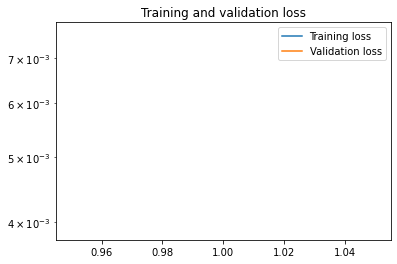

In [ ]:
#Plot training and validation loss
from matplotlib import pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.yscale('log')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
l_loss=l_loss+loss
l_valloss=l_valloss+val_loss

In [ ]:
epochs = range(1, len(l_loss) + 1)

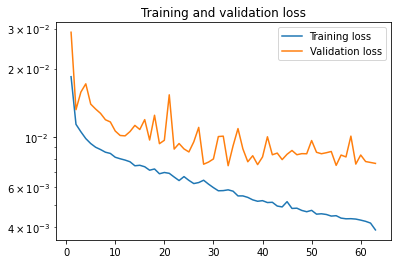

In [ ]:
plt.plot(epochs, l_loss, label='Training loss')
plt.plot(epochs, l_valloss, label='Validation loss')
plt.yscale('log')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.save_weights('/content/drive/MyDrive/weights/checkpoint')

In [ ]:
model.load_weights('/content/drive/MyDrive/weights/checkpoint')

In [ ]:
#Predict and QC the output
X_pred_test = model.predict(X_test)

In [ ]:
X_pred_test.shape

(500, 128, 128, 1)

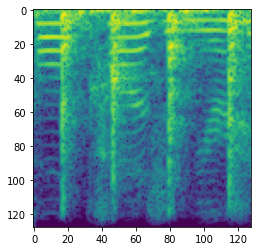

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
id = 10
plt.imshow(X_test[id,:,:,0])

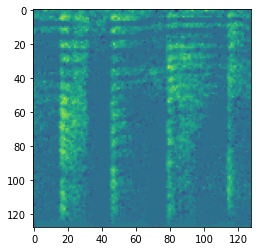

In [ ]:
plt.imshow(y_test[id,:,:,0])

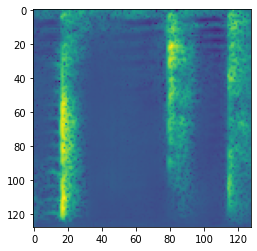

In [ ]:
plt.imshow(X_pred_test[id,:,:,0])

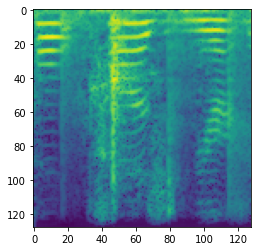

In [ ]:
plt.imshow(X_test[id,:,:,0]-X_pred_test[id,:,:,0]) #denoised

In [ ]:
f=wavfile.read('/content/drive/MyDrive/dataset/sound/soundnoisy_voice_long.wav')

In [ ]:
!pip install playsound

In [ ]:
from IPython.display import Audio

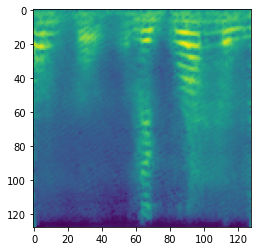

In [ ]:
plt.imshow(inv_scaled_in(X_test[id,:,:,0])-inv_scaled_ou(X_pred_test[id,:,:,0]))

In [ ]:
del X_in

In [ ]:
del X_ou

In [ ]:
 X_in = np.load('/content/drive/MyDrive/dataset/spectrogram/spectrogramnoisy_voice_amp_db.npy')

In [ ]:
X_in.shape

(5000, 128, 128)

In [ ]:
X_denoise = X_in[4500:5000]-inv_scaled_ou(X_pred_test[:,:,:,0])

In [ ]:
X_denoise.shape

(500, 128, 128)

In [ ]:
audio_denoise_recons = matrix_spectrogram_to_numpy_audio(X_denoise, X_inpha[4500:5000], 8064, 63)

In [ ]:
nb_samples = audio_denoise_recons.shape[0]

In [ ]:
denoise_long = audio_denoise_recons.reshape(1, nb_samples * 8064)*10

In [ ]:
sf.write('denoised.wav', denoise_long[0, :], 8000)

In [ ]:
Audio('/content/denoised.wav')

Output hidden; open in https://colab.research.google.com to view.